In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-23 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.1
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

---

# Fourier Transform

![Time to Frequency Domain](files/images/time_freq_domain.png)

## The Fourier Transform is like a prism (not the NSA one)

![Prism](files/images/prism.png)

<br />
---
<br />

## Fourier Transform Definition

$$G(f) = \int_{-\infty}^\infty g(t) e^{-i 2 \pi f t} dt$$

<br />
For our purposes, we will just be using the discrete version...
<br /><br />

## Discrete Fourier Transform (DFT) Definition
$$G(\frac{n}{N}) = \sum_{k=0}^{N-1} g(k) e^{-i 2 \pi k \frac{n}{N} }$$

**Meaning**:

* $N$ is the total number of samples
* $g(k)$ is the kth sample for the time-domain function (i.e. the DFT input)
* $G(\frac{n}{N})$ is the output of the DFT for the frequency that is $\frac{n}{N}$ cycles per sample; so to get the frequency, you have to multiply $n/N$ by the sample rate.

# How to represent waves

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

freq = 1 #hz - cycles per second
amplitude = 3
time_to_plot = 2 # second
sample_rate = 100 # samples per second
num_samples = sample_rate * time_to_plot

t = np.linspace(0, time_to_plot, num_samples)
signal = [amplitude * np.sin(freq * i * 2*np.pi) for i in t] # Explain the 2*pi

### Why the 2*pi?

* If we want a wave which completes 1 cycle per second, so sine must come back to the same position on a circle as the starting point
* So one full rotation about a circle - $2 \pi$ (in radians)

![sine_curve](files/images/Sine_curve_drawing_animation.gif)

# Plot the wave

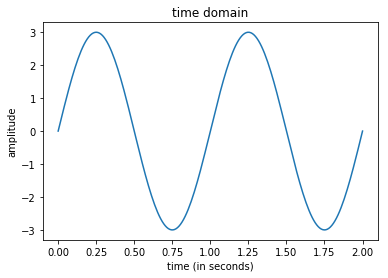

In [4]:
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signal)

# Convert to the Frequency Domain



In [5]:
fft_output = np.fft.rfft(signal)
magnitude_only = [np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]

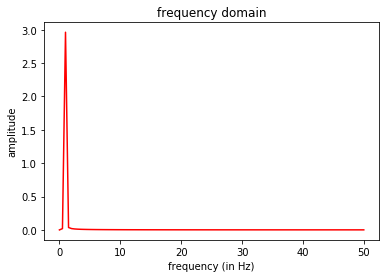

In [6]:
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')
plt.plot(frequencies, magnitude_only, 'r')

## Question: So what does the Fourier Transform give us?

* The amplitudes of simple sine waves
* Their starting position - phase (we won't get into this part much)

## Question: what sine wave frequencies are used?

* Answer: This is determined by how many samples are provided to the Fourier Transform
* Frequencies range from 0 to (number of samples) / 2
* **Example: If your sample rate is 100Hz, and you give the FFT 100 samples, the FFT will return the amplitude of the components with frequencies 0 to 50Hz.**